In [1]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client

c = Client()


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/distributed/dashboard/core.py:74: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 13] Permission denied
  warnings.warn("\n" + msg)


In [2]:
c

Client Scheduler: tcp://127.0.0.1:37563 Dashboard: http://127.0.0.1:42102/status,Cluster Workers: 8 Cores: 48 Memory: 134.91 GB


In [3]:
import xarray as xr 
import dask 
import numpy as np 
import os 
import time 
import glob
from datetime import date
import numpy.ma as ma

import matplotlib.pyplot as plt

today=date.today()

import seaborn as sns
sns.set(color_codes=True)

#https://pmall.univ-grenoble-alpes.fr/docs/auto_examples_code/windrose/windrose-exemple.html

In [4]:
Date_sept=['20120901','20120902','20120903','20120904','20120905','20120906','20120907','20120908','20120909','20120910','20120911','20120912','20120913','20120914','20120915','20120916','20120917','20120918','20120919','20120920','20120921','20120922','20120923','20120924','20120925','20120926','20120927','20120928','20120929','20120930']
Date_march=['20130301','20130302','20130303','20130304','20130305','20130306','20130307','20130308','20130309','20130310','20130311','20130312','20130313','20130314','20130315','20130316','20130317','20130318','20130319','20130320','20130321','20130322','20130323','20130324','20130325','20130326','20130327','20130328','20130329','20130330']
Date_month={'march':Date_march,'sept':Date_sept}

In [5]:
def get_buoy_spice(box,month):
    print('get buoy and spice for box '+str(box)+' and month '+str(month))
    Date=Date_month[month]
    datasets_buoy = []
    datasets_spice = []
    for date in Date:
        zbuoy_file = '/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/1d/turner-angle/NATL60-CJM165_grad-buoy_'+str(date)+'.1d_'+str(box)+'.nc'
        zspice_file='/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/1d/turner-angle/NATL60-CJM165_grad-spice_'+str(date)+'.1d_'+str(box)+'.nc'
        zdsbuoy=xr.open_dataset(zbuoy_file)
        zdsspice=xr.open_dataset(zspice_file)
        datasets_buoy.append(zdsbuoy)
        datasets_spice.append(zdsspice)
    all_buoy=xr.concat(datasets_buoy,dim='z')
    all_spice=xr.concat(datasets_spice,dim='z')
    buoy=all_buoy['buoy']
    spice=all_spice['spice']
    return buoy,spice
   
    
    

In [6]:
buoy_sept_AC,spice_sept_AC=get_buoy_spice('AC','sept')
buoy_march_AC,spice_march_AC=get_buoy_spice('AC','march')
buoy_sept_GS,spice_sept_GS=get_buoy_spice('GS','sept')
buoy_march_GS,spice_march_GS=get_buoy_spice('GS','march')
buoy_sept_NE,spice_sept_NE=get_buoy_spice('NE','sept')
buoy_march_NE,spice_march_NE=get_buoy_spice('NE','march')


get buoy and spice for box AC and month sept
get buoy and spice for box AC and month march
get buoy and spice for box GS and month sept
get buoy and spice for box GS and month march
get buoy and spice for box NE and month sept
get buoy and spice for box NE and month march


In [7]:
np.max(buoy_sept_GS)

<xarray.DataArray 'buoy' ()>
array(6.03029e-07)

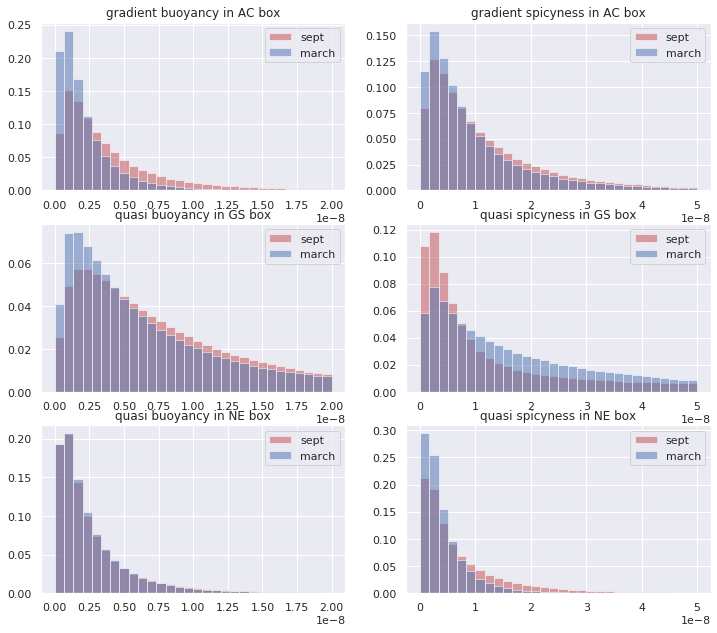

In [16]:
fig = plt.figure(figsize=(12, 10.5))

axes1 = fig.add_subplot(3, 2, 1)
weights = np.ones_like(buoy_sept_AC)/float(len(buoy_sept_AC))
axes1.hist(buoy_sept_AC,30, alpha = 0.5,range=(0,2e-8),color='r', weights=weights, label='sept')
weights = np.ones_like(buoy_march_AC)/float(len(buoy_march_AC))
axes1.hist(np.abs(buoy_march_AC),30, alpha = 0.5,range=(0,2e-8),color='b', weights=weights, label='march')

plt.legend()
plt.title('gradient buoyancy in AC box')

axes2 = fig.add_subplot(3, 2, 2)
weights = np.ones_like(spice_sept_AC)/float(len(spice_sept_AC))
axes2.hist(spice_sept_AC,30, alpha = 0.5,range=(0,0.5e-7),color='r', weights=weights, label='sept')
weights = np.ones_like(spice_march_AC)/float(len(spice_march_AC))
axes2.hist(np.abs(spice_march_AC),30, alpha = 0.5,range=(0,0.5e-7),color='b', weights=weights, label='march')

plt.legend()
plt.title('gradient spicyness in AC box')

axes3 = fig.add_subplot(3, 2, 3)
weights = np.ones_like(buoy_sept_GS)/float(len(buoy_sept_GS))
axes3.hist(buoy_sept_GS,30, alpha = 0.5,range=(0,2e-8),color='r', weights=weights, label='sept')
weights = np.ones_like(buoy_march_GS)/float(len(buoy_march_GS))
axes3.hist(np.abs(buoy_march_GS),30, alpha = 0.5,range=(0,2e-8),color='b', weights=weights, label='march')

plt.legend()
plt.title('quasi buoyancy in GS box')

axes4 = fig.add_subplot(3, 2, 4)
weights = np.ones_like(spice_sept_GS)/float(len(spice_sept_GS))
axes4.hist(spice_sept_GS,30, alpha = 0.5,range=(0,0.5e-7),color='r', weights=weights, label='sept')
weights = np.ones_like(spice_march_GS)/float(len(spice_march_GS))
axes4.hist(np.abs(spice_march_GS),30, alpha = 0.5,range=(0,0.5e-7),color='b', weights=weights, label='march')

plt.legend()
plt.title('quasi spicyness in GS box')

axes5 = fig.add_subplot(3, 2, 5)
weights = np.ones_like(buoy_sept_NE)/float(len(buoy_sept_NE))
axes5.hist(buoy_sept_NE,30, alpha = 0.5,range=(0,2e-8),color='r', weights=weights, label='sept')
weights = np.ones_like(buoy_march_NE)/float(len(buoy_march_NE))
axes5.hist(np.abs(buoy_march_NE),30, alpha = 0.5,range=(0,2e-8),color='b', weights=weights, label='march')

plt.legend()
plt.title('quasi buoyancy in NE box')

axes6 = fig.add_subplot(3, 2, 6)
weights = np.ones_like(spice_sept_NE)/float(len(spice_sept_NE))
axes6.hist(spice_sept_NE,30, alpha = 0.5,range=(0,0.5e-7),color='r', weights=weights, label='sept')
weights = np.ones_like(spice_march_NE)/float(len(spice_march_NE))
axes6.hist(np.abs(spice_march_NE),30, alpha = 0.5,range=(0,0.5e-7),color='b', weights=weights, label='march')

plt.legend()
plt.title('quasi spicyness in NE box')

plt.savefig('hist_grad-buoy-spice_all-boxes.png')
